In [9]:
#Importar paquetes y cargar datos 

import numpy as np
import matplotlib.pylab as plt
import pandas as pd

data = pd.read_csv('Cars93.csv')
data.keys()

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [10]:
#Visualización de los datos
data.head(8)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,4,2.2,110,5200,2565,No,16.4,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,6,3.8,170,4800,1570,No,18.0,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,6,5.7,180,4000,1320,No,23.0,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster


In [11]:
# Comprobar espacios vacíos
data.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [19]:
#Los features con espacios vacios son valores númericos y se refieren a espacio del auto en una zona
# Entonces se entiende que si son nulos es porque no tienen dicho espacio y se reemplazan por 0

data.fillna(0, inplace=True)

#Seleccionar features, se dejan por fuera los valores no numéricos y los mínimos y máximos de los precios.

keys = ['MPG.city', 'MPG.highway', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 
        'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 
        'Luggage.room', 'Weight' ]
y = 'Price'

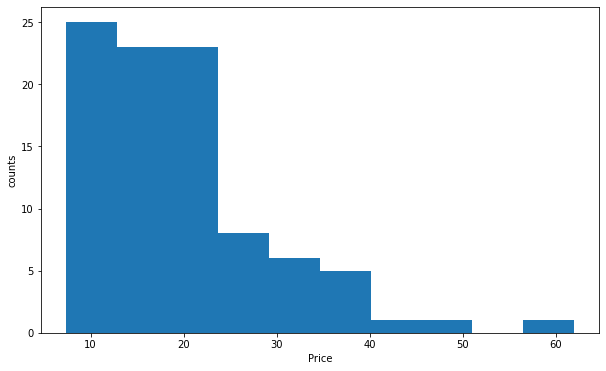

In [20]:
#Visualizar la variable objetivo

fig = plt.figure(figsize=(10,6))
plt.hist(data['Price'])
plt.xlabel('Price')
plt.ylabel('counts')
plt.show()

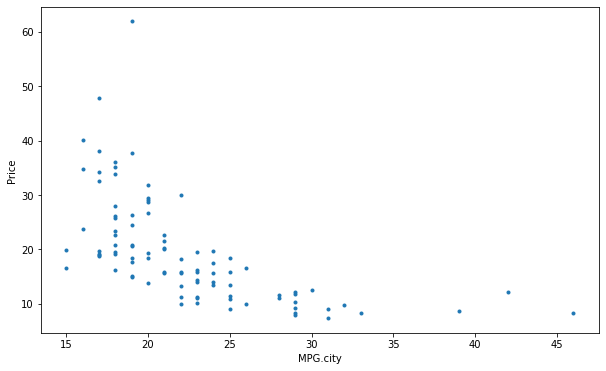

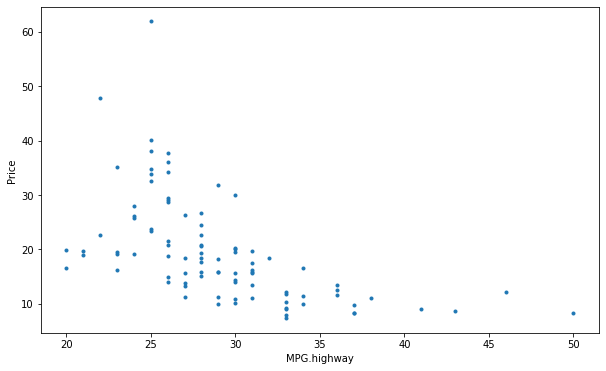

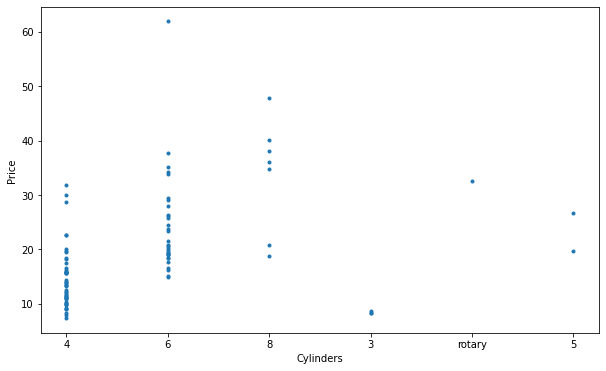

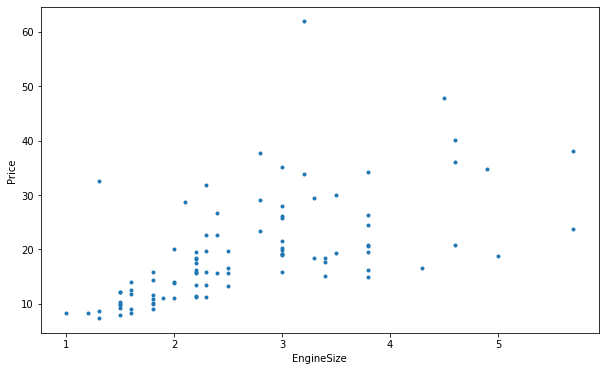

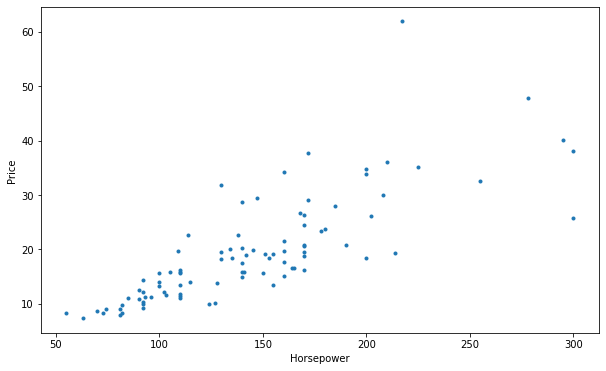

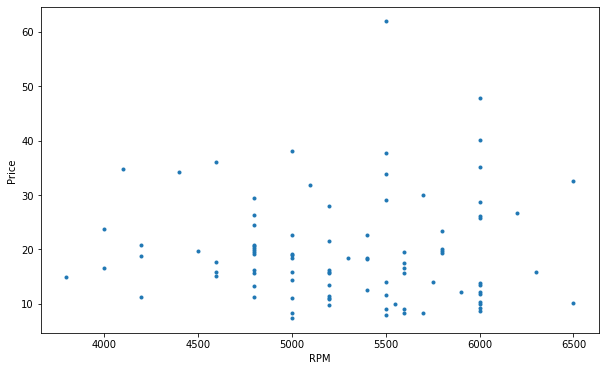

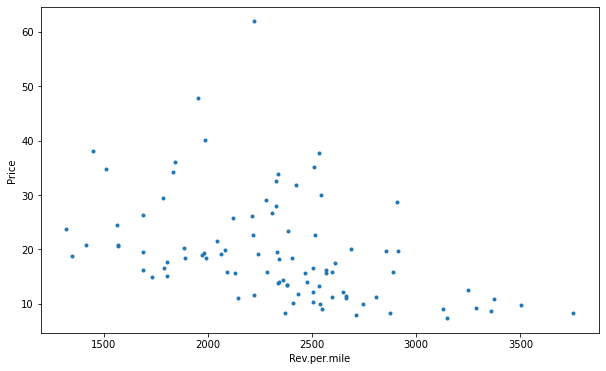

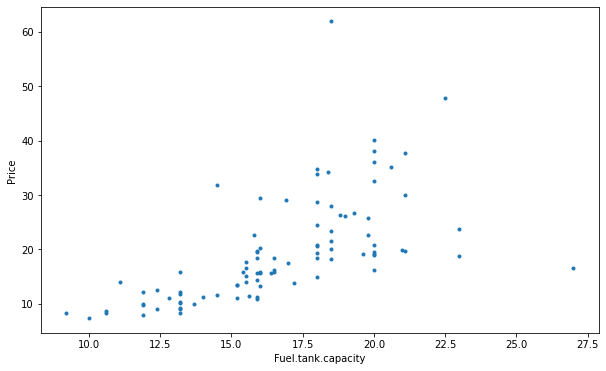

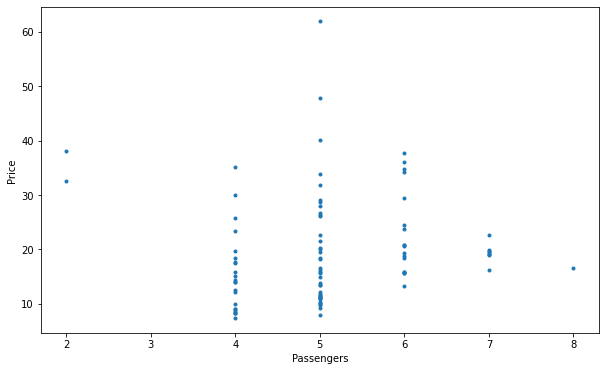

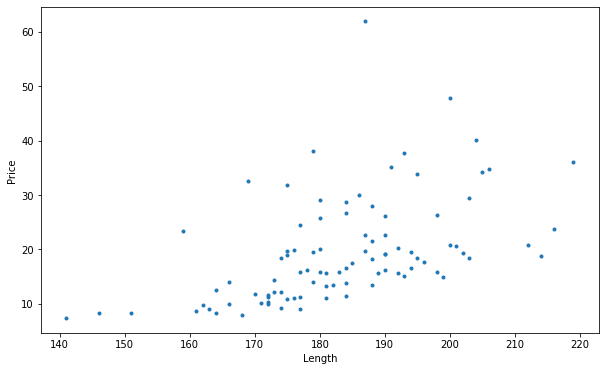

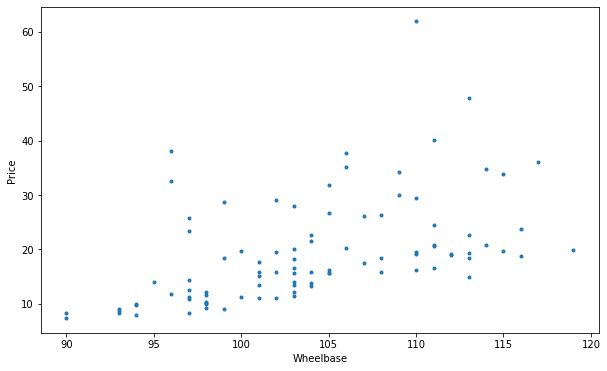

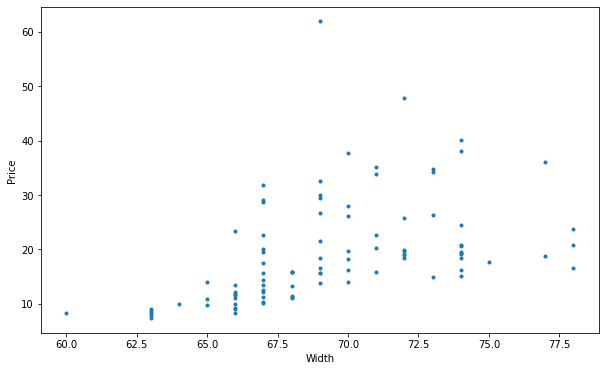

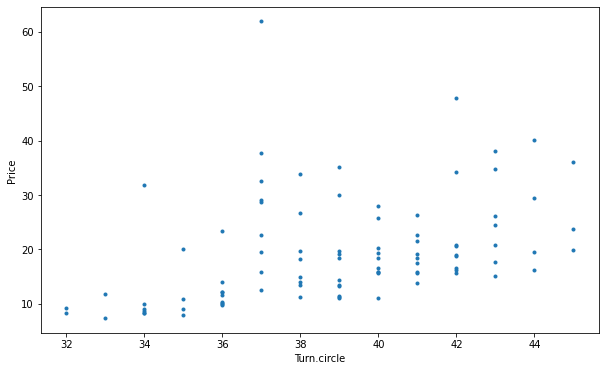

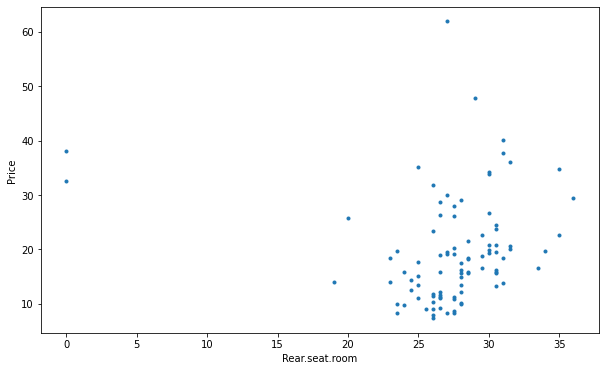

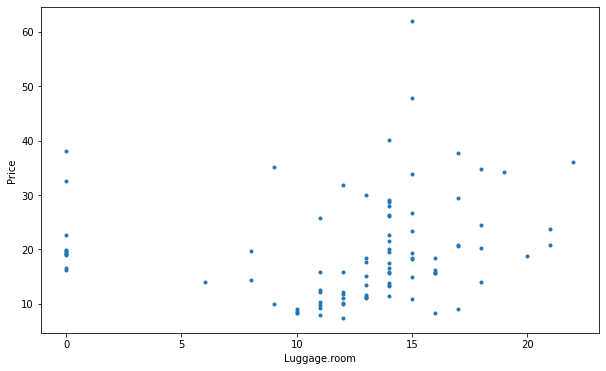

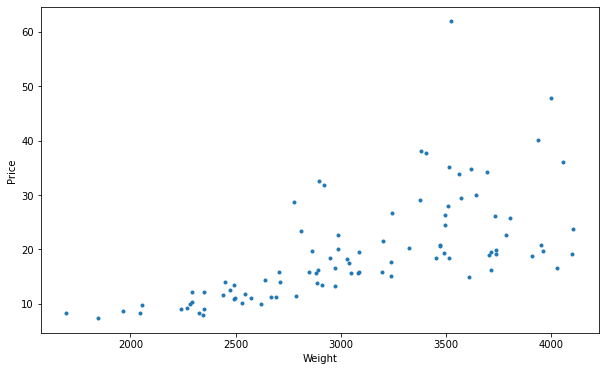

In [21]:
#Con la anterior se podría dividir como un auto económico los menores 20 y caro mayores o iguales a este. Para que el numero de datos sea similar
#También se podrían hacer 3 divisiones, de 20 cada una, pero el número de datos seria muy disparejo especialmente en el rango 40-60.

#Clasificación visual de los features

for i in keys:
  fig = plt.figure(figsize=(10,6))
  plt.plot(data[i],data[y],'.')
  plt.xlabel(i)
  plt.ylabel(y)
  plt.show()



In [29]:
#Re defino keys eliminando cylinder ya que tiene un valor no numérico

keys = ['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 
        'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 
        'Luggage.room', 'Weight']

#Separo binario entre económico = 0 y costoso = 1 con el corte en 30

Y = np.array(data[y], dtype=int)
print(np.unique(Y,return_counts=True))

Y[Y<20] = 0
Y[Y>=20] = 1

print(np.unique(Y,return_counts=True))

(array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 47, 61]), array([1, 5, 4, 5, 7, 3, 4, 4, 8, 4, 2, 5, 9, 5, 1, 2, 2, 1, 1, 3, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]))
(array([0, 1]), array([61, 32]))


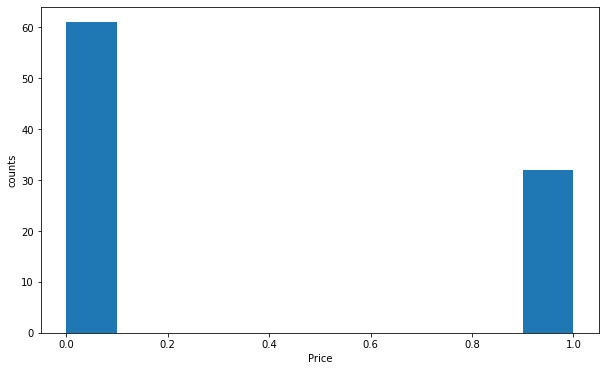

In [30]:
#Plot de los datos binarios

fig = plt.figure(figsize=(10,6))
plt.hist(Y)
plt.ylabel('counts')
plt.xlabel('Price')
plt.show()


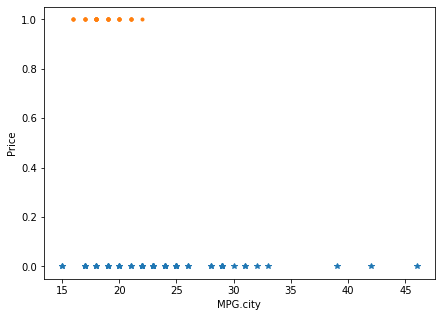

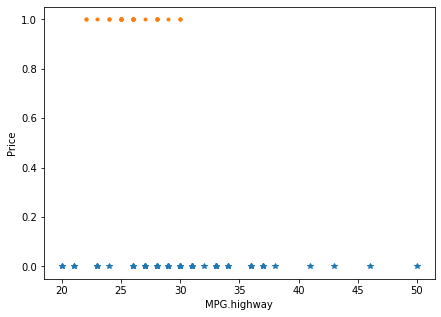

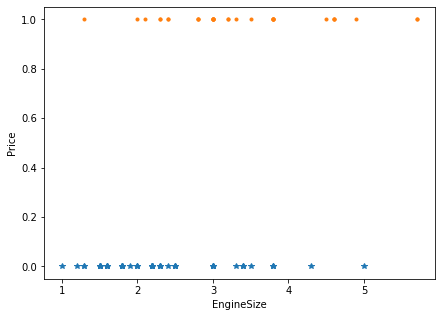

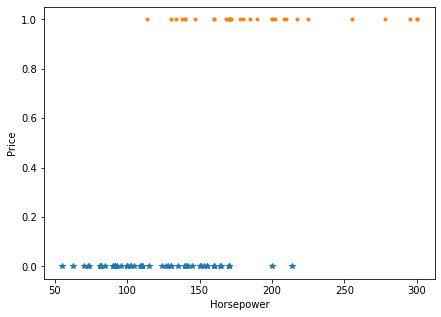

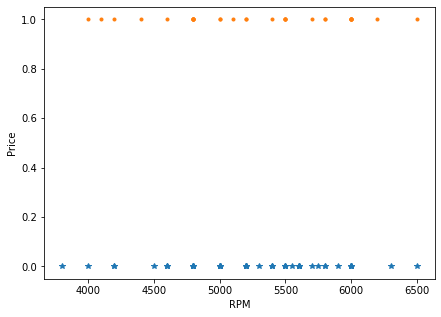

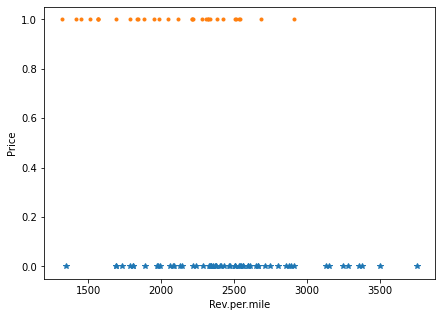

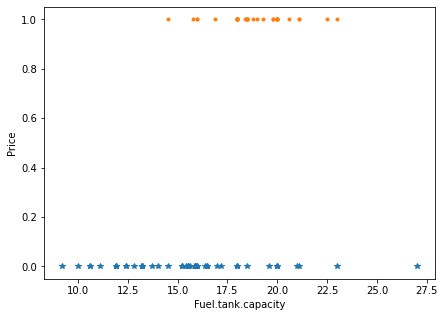

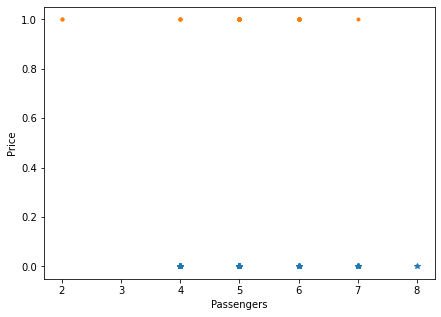

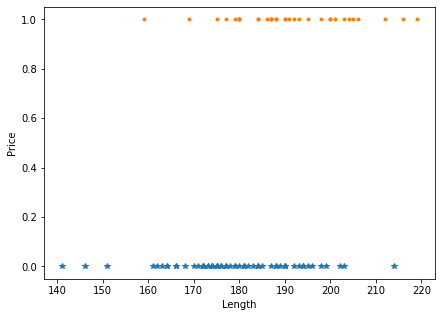

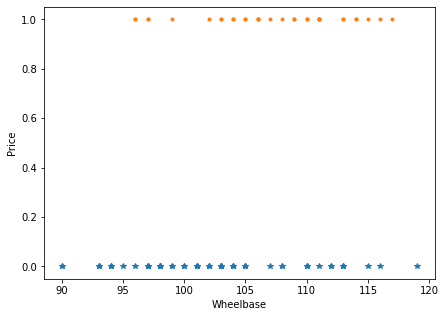

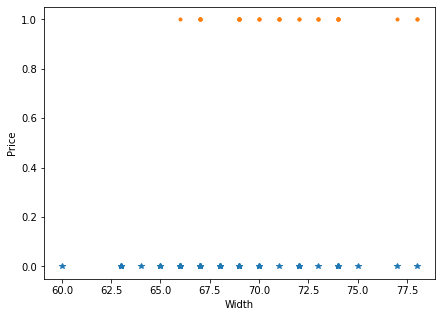

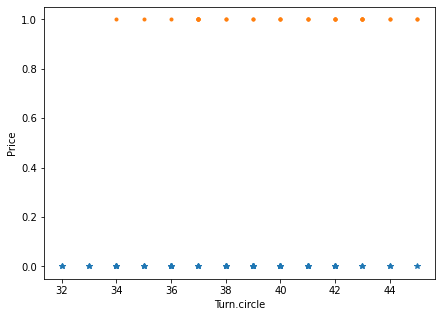

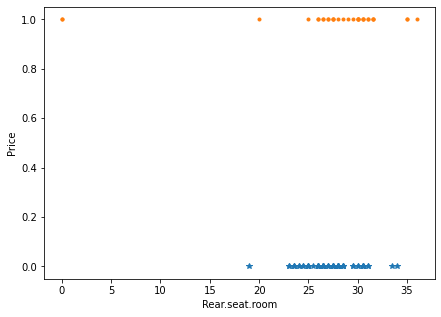

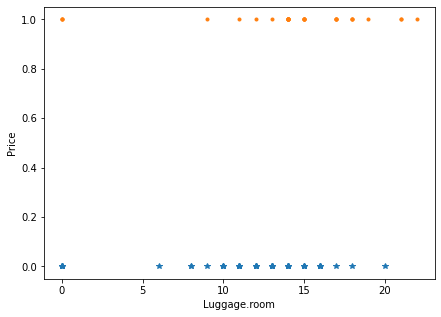

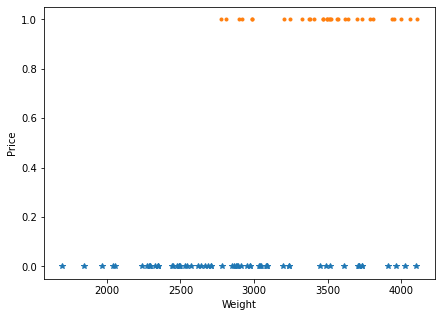

In [31]:
#Ploteo nueamente los features binarios para ver la separación.
for i in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[i][Y==0],Y[Y==0],'*')
  plt.plot(data[i][Y==1],Y[Y==1],'.')
  plt.xlabel(i)
  plt.ylabel(y)
  plt.show()

In [34]:
#Nuevamente re defino keys, seleccionando los features que se muestren más relevantes. 
#El criterio de decisión fue: Puntos con concentraciones en zonas diferentes del eje x.

keys = ['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'Rev.per.mile', 'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width', 'Weight']

In [32]:
#Instalación paquete de correlación
!pip install corner

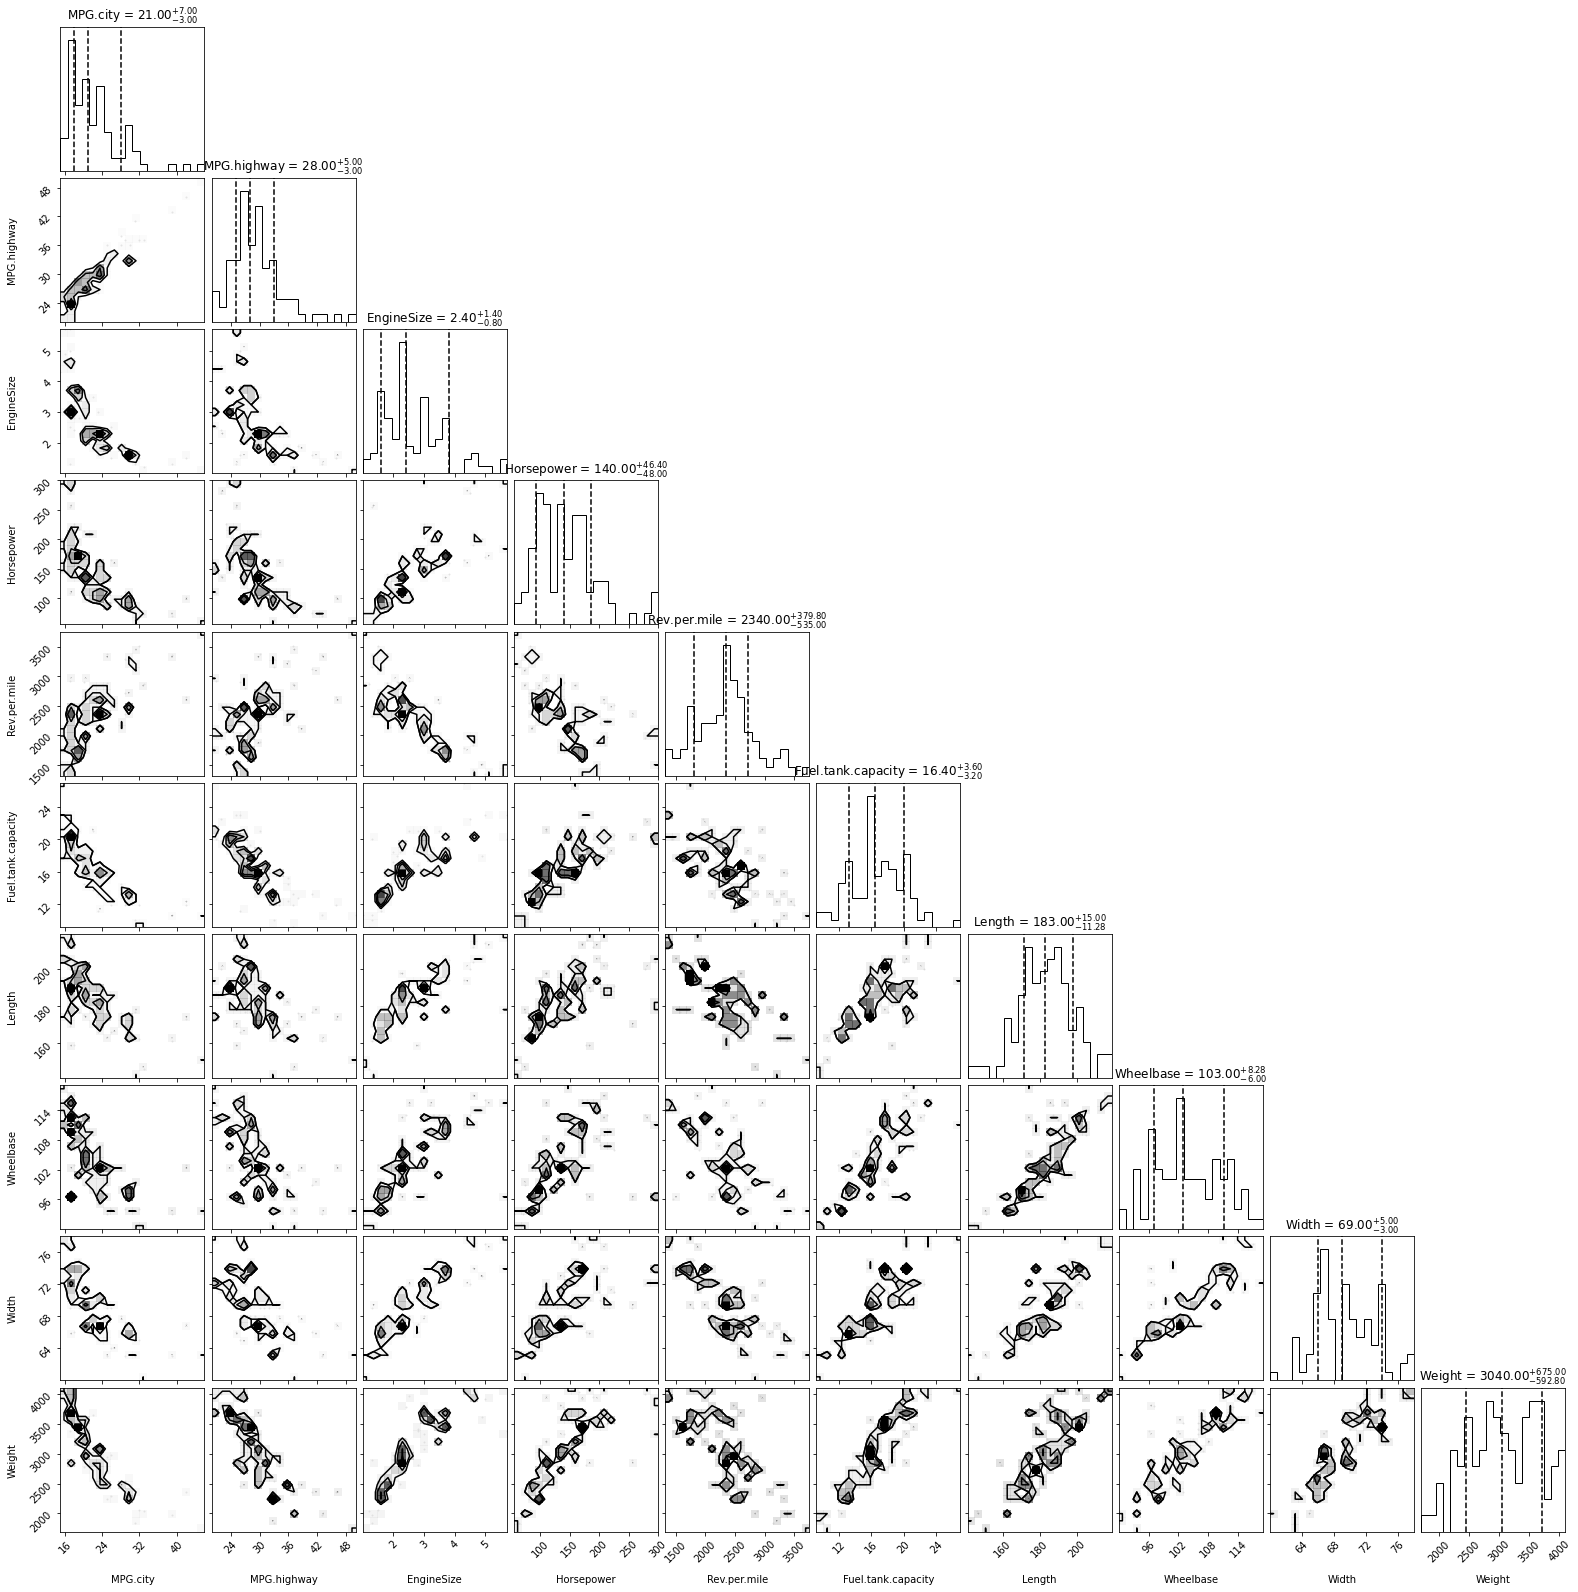

In [35]:
#Ploteo correlación variables
import corner

figure = corner.corner(data[keys], labels=keys,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [36]:
#Debido a las concentraciones de las curvas, los dos features más importantes probablemente serán length y Rev per mile, Wheelbase y Rev per mile, o
#lenght y Fuel thank capacity
#Arreglamos la escala

from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(data[keys])

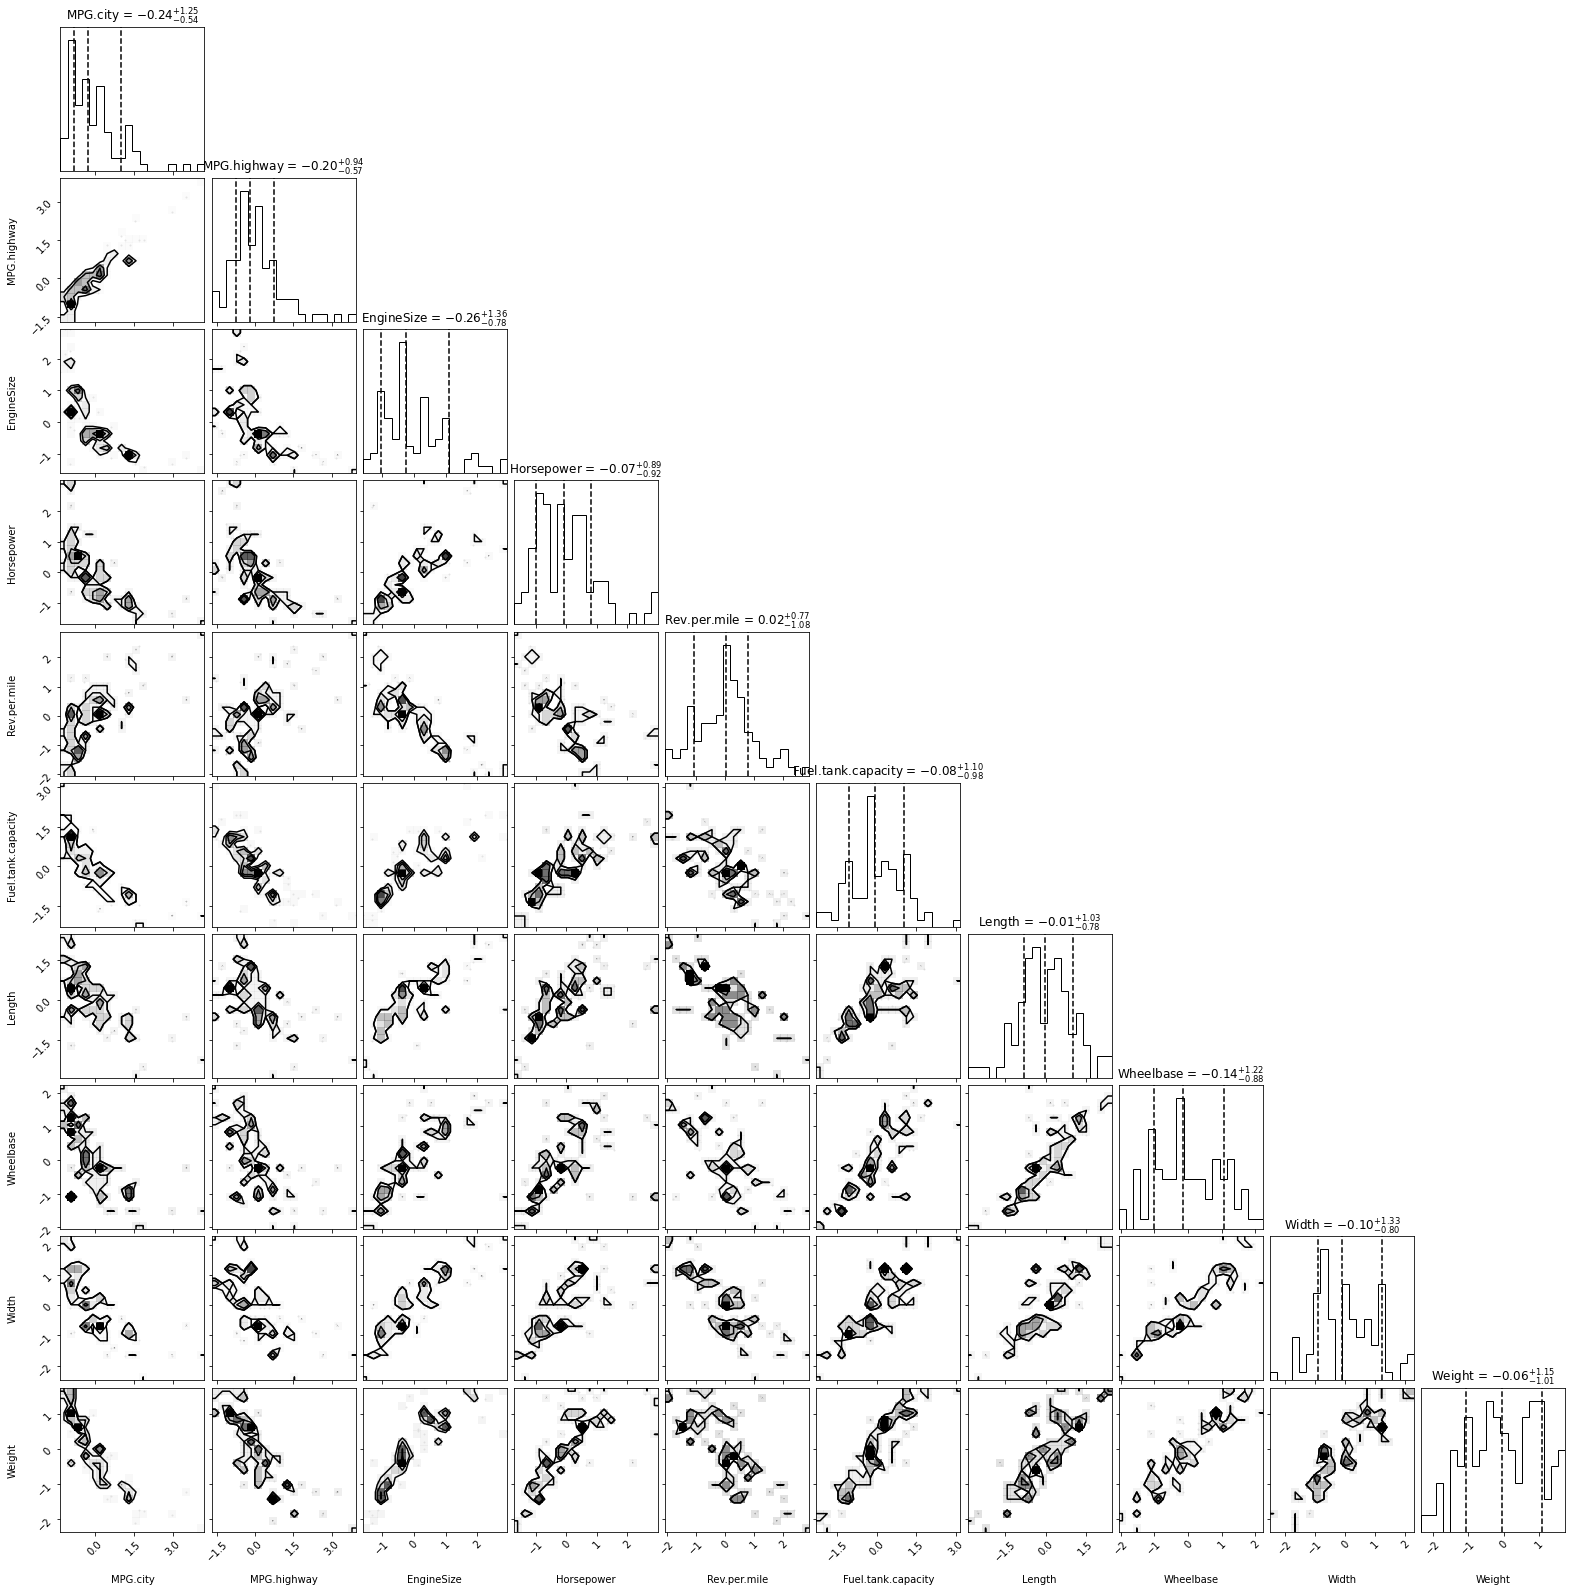

In [37]:
figure = corner.corner(data_scaled, labels=keys,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [39]:
#Comprobamos la hipotesis con random forest
#Importamos el paquete

from sklearn.ensemble import RandomForestClassifier

In [45]:
#Separamos los datos de entrenamiento y test

from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=100, max_depth=15)

X_entreno, X_test, Y_entreno, Y_test = train_test_split(np.array(data[keys]),Y)

model.fit(X_entreno,Y_entreno)

Y_predt = model.predict(X_test)

In [46]:
#Obtenemos la precision

precision = sum(Y_predt == Y_test)/len(Y_test)

In [50]:
#Calculamos la importancia de los parametros en funcion de cuanto aportan al modelo
importancia = model.feature_importances_
importancia

array([0.16098383, 0.08393565, 0.07995012, 0.22524714, 0.0387223 ,
       0.10589376, 0.06110505, 0.06020683, 0.0618596 , 0.12209572])

In [49]:
#Organizamos los parametros de menor a mayor
ii = np.argsort(importancia)[::-1]
np.array(keys)[ii]

array(['Horsepower', 'MPG.city', 'Weight', 'Fuel.tank.capacity',
       'MPG.highway', 'EngineSize', 'Width', 'Length', 'Wheelbase',
       'Rev.per.mile'], dtype='<U18')